In [32]:
import os
from pprint import pprint
from tqdm import tqdm
import  spacy
from spacy.tokens import DocBin
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
with open("subtitles_raw/en_raw_0-900.txt", "rt", encoding="utf-8") as f:
    en_all = [line.strip() for line in f]

with open("subtitles_raw/ru_raw_0-900.txt", "rt", encoding="utf-8") as f:
    ru_all = [line.strip() for line in f]

with open("corpora/subtitles/ru_subtitles_spacy_dump.bin", "rb") as f:
    restored_bytes_data = f.read()

nlp = spacy.blank("ru")
doc_bin = DocBin().from_bytes(restored_bytes_data)
ru_all_docs = list(doc_bin.get_docs(nlp.vocab))

In [6]:
with open("corpora/subtitles/en_subtitles_spacy_dump.bin", "rb") as f:
    en_restored_bytes_data = f.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_restored_bytes_data)
en_all_docs = list(doc_bin.get_docs(nlp.vocab))

In [8]:
with open("corpora/subtitles/translations/opus10_spacy.bin", "rb") as f:
    translated_restored_bytes_data = f.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(translated_restored_bytes_data)
translated_all_docs = list(doc_bin.get_docs(nlp.vocab))

In [9]:
def find_lines_with_word(original_word: str, docs) -> list:
    indexes = []
    for i, sentence in enumerate(docs):
        for token in sentence:
            if token.lemma_.lower() == original_word:
                indexes.append(i)
                break
    return indexes

In [10]:
original_word = "хороший"
indexes = find_lines_with_word(original_word, ru_all_docs)
len(indexes)

16632

In [5]:
filename_translated_all = "corpora/subtitles/translations/opus10_whole.txt"
with open(filename_translated_all, "rt", encoding="utf-8") as f:
    translated_all = [line.rstrip() for line in f.readlines()]
len(translated_all)

900000

In [19]:
chunk_size = 20000
latest_chunk = 0

names_mwmf = []
names_itermax = []
names_inter = []

for chunk_start in range(latest_chunk, 900000, chunk_size):
    mwmf = ""
    itermax = ""
    inter = ""

    folder_name = "corpora/subtitles/numerical_alignment"
    filename = f"aligned_{chunk_start}-{chunk_start + chunk_size - 1}"
    fname_mwmf = f"{folder_name}/mwmf/{filename}"
    fname_itermax = f"{folder_name}/itermax/{filename}"
    fname_inter = f"{folder_name}/inter/{filename}"
    
    names_mwmf.append(fname_mwmf)
    names_itermax.append(fname_itermax)
    names_inter.append(fname_inter)

In [21]:
outname_mwmf = "corpora/subtitles/mwmf"
outname_itermax = "corpora/subtitles/itermax"
outname_inter = "corpora/subtitles/inter"

with open(outname_mwmf, 'w', encoding="utf-8") as outfile:
    for fname in names_mwmf:
        with open(fname, "r", encoding="utf-8") as infile:
            for line in infile:
                outfile.write(line)

In [22]:
with open(outname_itermax, 'w', encoding="utf-8") as outfile:
    for fname in names_itermax:
        with open(fname, "r", encoding="utf-8") as infile:
            for line in infile:
                outfile.write(line)

with open(outname_inter, 'w', encoding="utf-8") as outfile:
    for fname in names_inter:
        with open(fname, "r", encoding="utf-8") as infile:
            for line in infile:
                outfile.write(line)

In [17]:
with open("corpora/subtitles/translations/inter", "rt", encoding="utf-8") as file:
    t_aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("corpora/subtitles/translations/itermax", "rt", encoding="utf-8") as file:
    t_aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("corpora/subtitles/translations/mwmf", "rt", encoding="utf-8") as file:
    t_aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

In [23]:
with open("corpora/subtitles/inter", "rt", encoding="utf-8") as file:
    aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("corpora/subtitles/itermax", "rt", encoding="utf-8") as file:
    aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("corpora/subtitles/mwmf", "rt", encoding="utf-8") as file:
    aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

подготовка окончена строим графики

In [12]:
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

ru_stopwords.add('это')
ru_stopwords.add('всё')
ru_stopwords.add('свой')
ru_stopwords.add('ещё')
ru_stopwords.add('весь')

en_stopwords.add("'s")

from string import punctuation
punct_list = [c for c in punctuation]
punct_list.append('--')
punct_list.append('...')
punct_list.append('–')

In [13]:
def plot_variety_pie(variety_dict, original_word: str):
    variety_dict_items = list(variety_dict.items())
    variety_dict_items.sort(key=lambda x: -len(x[1]))
    translations = [x[0] for x in variety_dict_items]
    # translations.append("other")
    number_of_matches = [len(x[1]) for x in variety_dict_items]
    # number_of_matches.append(other_len)

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(number_of_matches, autopct = lambda pct: func(pct, number_of_matches), labels = translations)

    plt.title(original_word)
    plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

    # show plot
    plt.show()

In [29]:
def get_variety_dict_from_alignment(original_word: str, aligned_text: list, t_aligned_text: list):
    variety_dict = defaultdict(lambda : set())
    translation_dict = defaultdict(lambda : set())
    
    for i in tqdm(range(len(aligned_text))):
        phrase = []
        for src_idx, tgt_idx in aligned_text[i]:
            try:
                if ru_all_docs[i][src_idx].lemma_ == original_word \
                    and en_all_docs[i][tgt_idx].lemma_ not in en_stopwords \
                        and en_all_docs[i][tgt_idx].lemma_ not in punct_list:
                    phrase.append(en_all_docs[i][tgt_idx].lemma_)
            except:
                print("Original:", i, src_idx, tgt_idx)
                continue
        
        if phrase:
            phrase.sort()
            phrase = ' '.join(phrase)
            variety_dict[phrase].add(i)
        
            translated_phrase = []
            
            for tsrc_idx, ttgt_idx in t_aligned_text[i]:
                try:
                    tlemma = en_all_docs[i][ttgt_idx].lemma_
                    if ru_all_docs[i][tsrc_idx].lemma_ == original_word \
                        and tlemma not in en_stopwords \
                            and tlemma not in punct_list:
                        translated_phrase.append(tlemma)
                except:
                    print("Translation:", i, tsrc_idx, ttgt_idx)
                    continue

            translated_phrase.sort()
            translated_phrase = ' '.join(translated_phrase)
            translation_dict[translated_phrase].add(i)

    return variety_dict, translation_dict

In [30]:
word = "рука"
data = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)

  4%|▍         | 39773/900000 [00:00<00:06, 130231.75it/s]

Translation: 18357 16 15
Translation: 18357 16 16
Translation: 18357 17 17
Translation: 18357 18 18
Translation: 18357 20 19
Translation: 18357 21 21
Translation: 18357 22 25
Translation: 18357 23 22
Translation: 18357 24 23
Translation: 18357 25 24
Translation: 22393 8 12


  7%|▋         | 66666/900000 [00:00<00:07, 114444.34it/s]

Translation: 46722 8 10
Translation: 46722 9 11
Translation: 54844 9 13
Translation: 54844 10 14
Translation: 57624 7 7
Translation: 57624 8 8
Translation: 57624 9 9
Translation: 57624 10 10
Translation: 57624 10 11
Translation: 57624 11 13
Translation: 57624 12 14


 15%|█▍        | 134629/900000 [00:01<00:07, 101983.78it/s]

Translation: 116581 19 23
Translation: 116581 20 24
Translation: 117620 10 13
Translation: 117620 11 14


 17%|█▋        | 155215/900000 [00:01<00:07, 101324.81it/s]

Translation: 142807 18 25
Translation: 142807 19 22
Translation: 142807 20 23
Translation: 142807 21 29
Translation: 160587 12 16


 24%|██▍       | 214209/900000 [00:02<00:07, 91111.40it/s] 

Translation: 191053 13 18
Translation: 191053 15 19


 26%|██▌       | 233538/900000 [00:02<00:07, 93500.68it/s]

Translation: 216696 9 20
Translation: 216696 12 21
Translation: 216696 13 22
Translation: 216696 14 23


 32%|███▏      | 286059/900000 [00:02<00:06, 101995.64it/s]

Translation: 256819 13 16
Translation: 256819 14 18
Translation: 256819 15 19
Translation: 260224 10 14
Translation: 260224 11 15
Translation: 273833 25 28
Translation: 273833 28 29
Translation: 273833 29 31
Translation: 273833 32 32


 36%|███▌      | 320687/900000 [00:03<00:05, 107823.58it/s]

Translation: 305817 23 22
Translation: 305817 24 23
Translation: 310424 7 11
Translation: 318978 12 18
Translation: 318978 13 20
Translation: 318978 14 21


 40%|████      | 362370/900000 [00:03<00:05, 98654.43it/s] 

Translation: 341647 11 13


 44%|████▎     | 392564/900000 [00:03<00:05, 97277.63it/s]

Translation: 371211 11 20
Translation: 371211 12 21
Translation: 376095 10 9
Translation: 380926 7 9
Translation: 388248 16 18
Translation: 388248 18 19
Translation: 389417 10 15
Translation: 389417 13 16


 49%|████▊     | 437643/900000 [00:04<00:04, 111671.78it/s]

Translation: 423328 16 19
Translation: 435128 16 18
Translation: 435128 17 19
Translation: 435128 18 20
Translation: 438910 14 23
Translation: 438910 16 24


 54%|█████▎    | 481695/900000 [00:04<00:03, 107341.23it/s]

Translation: 463551 15 17
Translation: 463551 16 18
Translation: 463551 17 19
Translation: 463551 18 20
Translation: 463551 19 21
Translation: 463551 20 22
Translation: 463551 21 23
Translation: 463551 22 24
Translation: 463551 23 25
Translation: 478611 9 10
Translation: 478611 10 11
Translation: 478611 11 12
Translation: 478611 12 13


 57%|█████▋    | 514469/900000 [00:05<00:03, 98941.50it/s] 

Translation: 492340 7 11
Translation: 507564 42 41
Translation: 507564 43 43
Translation: 507564 44 42
Translation: 507564 45 44
Translation: 507564 46 44
Translation: 507564 47 45
Translation: 507564 49 46
Translation: 507564 50 47
Translation: 507564 51 48
Translation: 507564 52 49
Translation: 507564 53 50
Translation: 507564 54 51


 64%|██████▍   | 578424/900000 [00:05<00:03, 106367.95it/s]

Translation: 560769 9 12
Translation: 560769 10 13


 72%|███████▏  | 651098/900000 [00:06<00:02, 122074.48it/s]

Translation: 630110 9 14
Translation: 630110 10 15
Translation: 630110 11 16
Translation: 630111 9 7
Translation: 630111 10 8


 76%|███████▌  | 685896/900000 [00:06<00:02, 104844.60it/s]

Translation: 662108 26 31
Translation: 662108 27 32
Translation: 662108 28 33
Translation: 662108 29 34
Translation: 662108 31 35
Translation: 662108 32 36
Translation: 662108 33 37
Translation: 662108 34 38
Translation: 662226 39 48
Translation: 673554 15 17
Translation: 673554 16 19
Translation: 673554 16 20
Translation: 673554 18 21
Translation: 673554 19 24
Translation: 673554 20 25
Translation: 673554 21 26
Translation: 673554 22 27
Translation: 673554 23 28
Translation: 673554 25 30


 82%|████████▏ | 740648/900000 [00:07<00:01, 106956.77it/s]

Translation: 720341 37 44
Translation: 720341 38 45
Translation: 720341 39 46
Translation: 724544 17 21
Translation: 724544 19 22


100%|██████████| 900000/900000 [00:08<00:00, 111812.89it/s]


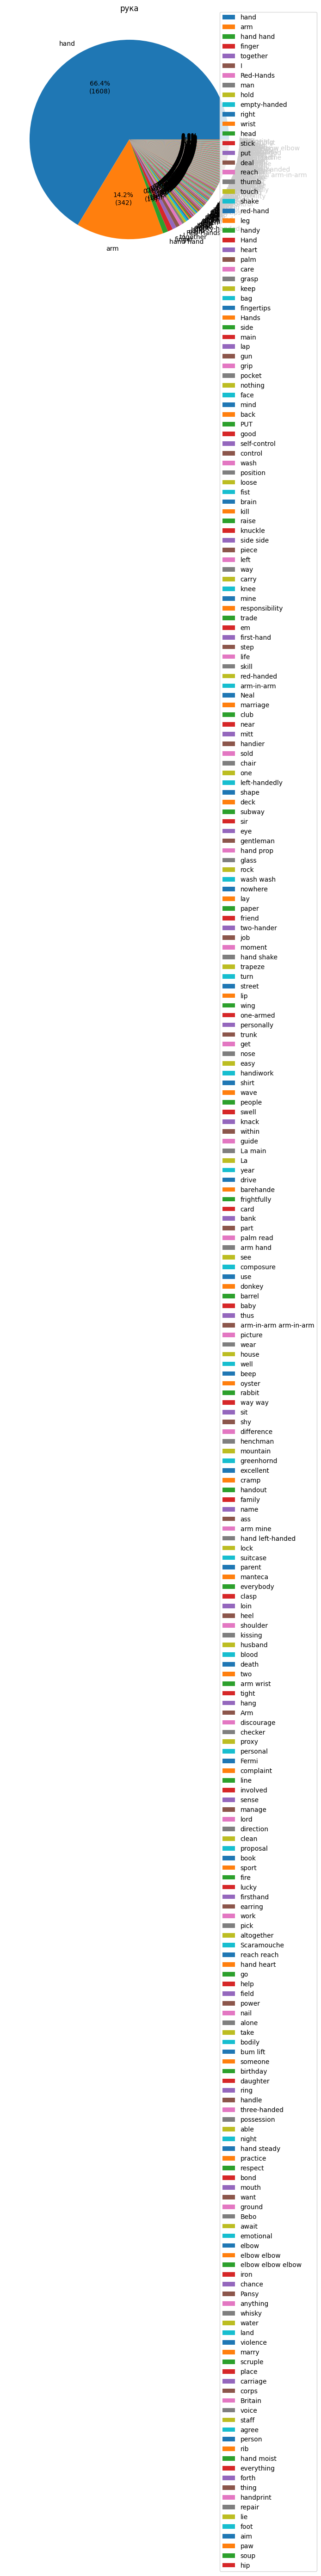

In [33]:
plot_variety_pie(data[0], word)